# 使用 DistilBERT 进行情感分析：基于预训练模型的实战

Hans Cao, 2024/11/28

```{contents}
:local:
```

## 情感分析

文本分类（Text Classification）是自然语言处理（NLP）中一种基础且重要的任务，旨在将文本数据分配到一个或多个预定义类别中。其应用非常广泛，如情感分析、垃圾邮件识别、新闻主题分类等。

情感分析（Sentiment Analysis）是文本分类的重要分支，用于识别文本的情感倾向（如积极、消极、中性）。常见应用包括产品评论分析、社交媒体情绪检测等。


近年来，随着预训练模型的发展，文本分类领域的性能取得了显著提升。诸如 BERT、RoBERTa 和 DistilBERT 等模型不仅大幅提高了情感分析的准确性，也简化了模型开发的流程。


## Hugging Face

Hugging Face是一个领先的自然语言处理（NLP）平台，提供了一个广泛的模型库，涵盖各种任务，如文本分类、文本生成、机器翻译、情感分析、命名实体识别、语音识别等。Hugging Face的核心是它的Transformers库，该库让用户能够方便地访问和使用预训练的深度学习模型。

Hugging Face的**模型库**非常庞大，包含了成千上万的模型。具体数字不断变化，因为新的模型持续上传和发布。截止目前，Hugging Face Hub上有超过**50,000**个模型，其中包括不同的框架支持（如TensorFlow、PyTorch）和多种语言的预训练模型。你可以在[Hugging Face Model Hub](https://huggingface.co/models)上查看和搜索各种模型。

总之，Hugging Face提供的模型种类覆盖了从文本分类到语音识别、从机器翻译到多模态任务的广泛应用，几乎能满足所有NLP和AI任务的需求。

## BERT & DistilBERT

BERT（Bidirectional Encoder Representations from Transformers）通过双向学习捕捉上下文信息，广泛应用于需要高精度的任务，如问答系统和命名实体识别（NER）。  
DistilBERT 是 BERT 的轻量级版本，其通过蒸馏（Distillation）技术保留了大部分性能，同时显著减少了模型的体积和计算需求，更适合实时情感分析等对响应速度有较高要求的场景。


下面使用DistilBERT模型[地址](https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english)来识别中英文文本的情感。

### 英文

In [1]:
from transformers import pipeline

# 初始化情感分析管道（使用 DistilBERT 微调模型）
sentiment_analyzer = pipeline("sentiment-analysis",
                              model="distilbert-base-uncased-finetuned-sst-2-english",
                              top_k=None,
                              device=0)  # 使用 GPU 0 进行加速；设置为 -1 可切换到 CPU

In [7]:
# 需要分析的文本
text = "I love this product! It's amazing."

# 使用模型进行情感分析
result = sentiment_analyzer(text)

# 输出分析结果
print(result)


[[{'label': 'POSITIVE', 'score': 0.9998866319656372}, {'label': 'NEGATIVE', 'score': 0.00011340089986333624}]]


输出中，`label` 表示情感类别（积极或消极），`score` 表示模型对该分类的信心。以示例文本为例，模型对“积极”情感的信心为 99.98%，表明该句子被强烈认为是积极的。

### 中文

加载其他人在hugging face上发布的模型，方法是一样的。

In [8]:
model = pipeline("sentiment-analysis",
                 model='bhadresh-savani/distilbert-base-uncased-emotion',
                 top_k=None,
                 device=0)

In [9]:
score = model("今天的天气比较冷，风很大，好在我下班早，到了家里我打开暖气，然后吃起了水果。")

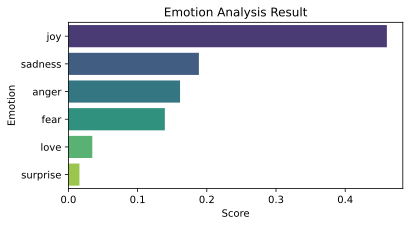

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg') 

# 将结果转换为 DataFrame
df = pd.DataFrame(score[0]).sort_values(by='score', ascending=False)

# 可视化情感分布
plt.figure(figsize=(6,3))
sns.barplot(x='score', y='label', data=df,
            palette='viridis', hue='label', legend=False)
plt.title("Emotion Analysis Result")
plt.xlabel("Score")
plt.ylabel("Emotion")
plt.show()


## 参考
- Prosise, J., 2023. Charpter 11, Applied machine learning and AI for engineers: solve business problems that can’t be solved algorithmically. O’Reilly, Cambridge.
